## Downloading Stock Prices

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
from pandas.plotting import autocorrelation_plot

In [4]:
start = datetime.datetime(2017, 7, 24) 
end = datetime.datetime(2022, 7, 23) 

# api calls with 'Adj Close' 
ibm = web.DataReader('IBM', 'yahoo', start, end)['Adj Close']
mmm = web.DataReader('MMM', 'yahoo', start, end)['Adj Close']
fb = web.DataReader('META', 'yahoo', start, end)['Adj Close']
amzn = web.DataReader('AMZN', 'yahoo', start, end)['Adj Close']

In [5]:
ibm

Date
2017-07-24    110.254059
2017-07-25    110.405098
2017-07-26    109.778282
2017-07-27    109.559242
2017-07-28    108.970200
                 ...    
2022-07-18    138.130005
2022-07-19    130.880005
2022-07-20    129.179993
2022-07-21    127.150002
2022-07-22    128.250000
Name: Adj Close, Length: 1259, dtype: float64

In [6]:
# api calls with 'Adj Close' column for business month (BM) by method 'pad'
ibm = web.DataReader('IBM', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
mmm = web.DataReader('MMM', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
fb = web.DataReader('META', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
amzn = web.DataReader('AMZN', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')

In [7]:
ibm

Date
2017-07-31    109.257179
2017-08-31    109.159889
2017-09-29    110.724457
2017-10-31    117.577942
2017-11-30    118.683769
2017-12-29    118.259811
2018-01-31    126.183922
2018-02-28    121.300163
2018-03-30    119.431984
2018-04-30    112.838821
2018-05-31    111.218674
2018-06-29    109.951546
2018-07-31    114.067810
2018-08-31    116.533302
2018-09-28    120.296257
2018-10-31     91.831223
2018-11-30    100.123108
2018-12-31     91.582802
2019-01-31    108.300880
2019-02-28    112.586632
2019-03-29    115.007408
2019-04-30    114.330910
2019-05-31    104.736191
2019-06-28    113.734337
2019-07-31    122.262337
2019-08-30    113.096703
2019-09-30    121.349655
2019-10-31    111.594635
2019-11-29    113.520607
2019-12-31    113.174423
2020-01-31    121.356010
2020-02-28    111.037468
2020-03-31     94.639931
2020-04-30    107.121498
2020-05-29    107.987503
2020-06-30    104.416740
2020-07-31    106.292900
2020-08-31    108.008736
2020-09-30    106.572235
2020-10-30     97.80

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

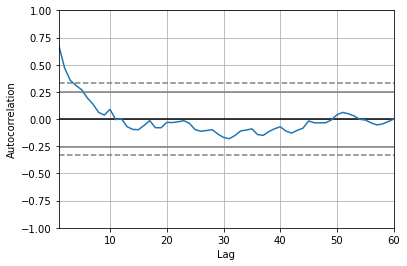

In [8]:
pd.plotting.autocorrelation_plot(ibm)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

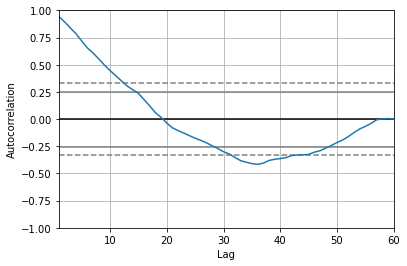

In [9]:
pd.plotting.autocorrelation_plot(amzn)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

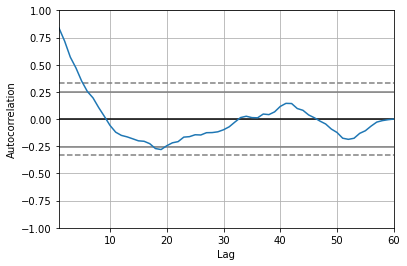

In [10]:
pd.plotting.autocorrelation_plot(mmm)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

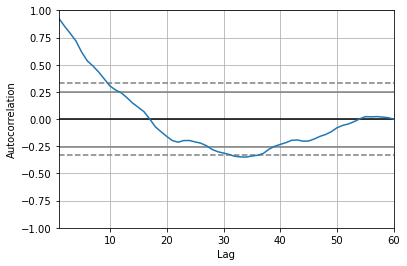

In [11]:
pd.plotting.autocorrelation_plot(fb)

<h1>Are they autocorrelated?


The plots demonstrate that there is some auto-correlation in the first ~ 6-8 months or so showing a value closer to 1, but then the correlation drops closer to 0 for the remainder. 

In [12]:
ibm=ibm/ibm.shift(1)-1

In [13]:
ibm=ibm.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

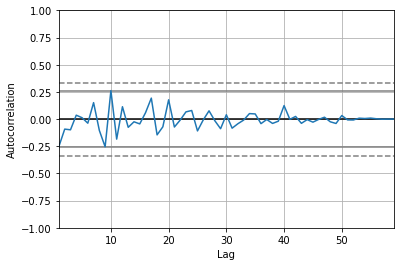

In [14]:
autocorrelation_plot(ibm)

In [15]:
mmm=mmm/mmm.shift(1)-1

In [16]:
mmm=mmm.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

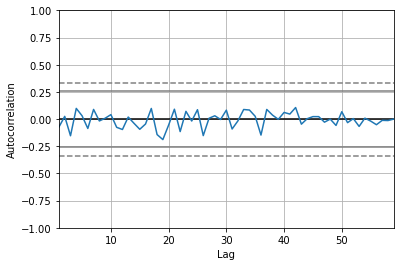

In [17]:
autocorrelation_plot(mmm)

In [18]:
amzn=amzn/amzn.shift(1)-1

In [19]:
amzn=amzn.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

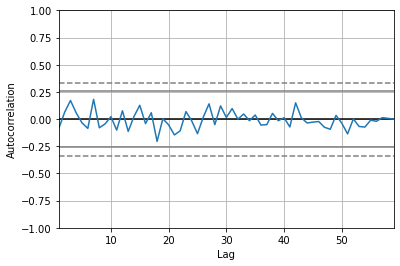

In [20]:
autocorrelation_plot(amzn)

In [21]:
fb=fb/fb.shift(1)-1

In [22]:
fb=fb.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

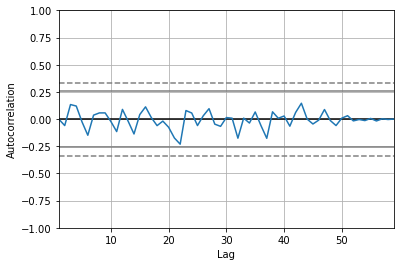

In [23]:
autocorrelation_plot(fb)

After performing our manipulations to the data using the shift method. We can see that the data stays pretty close to 0 and therefore demonstrates that the monthly returns do not indicate a trend or correlation in relation to the time variable. 

In [24]:
df = pd.concat([amzn,fb,ibm,mmm], axis=1)

In [25]:
#rename columns so we can see what's going on 
df.columns=["AMZN", "FB", "IBM","MMM"]

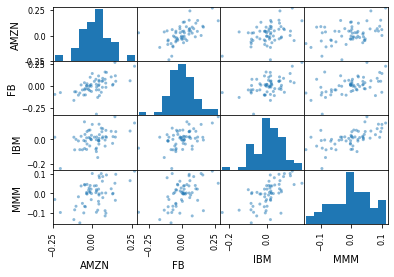

In [26]:
scatterplot=pd.plotting.scatter_matrix(df)

In [27]:
df.corr()

,AMZN,FB,IBM,MMM
AMZN,1.000000,0.569816,0.427622,0.425507
FB,0.569816,1.000000,0.483592,0.503430
IBM,0.427622,0.483592,1.000000,0.623581
MMM,0.425507,0.503430,0.623581,1.000000


Visually using the scatterplot function from pandas, there does appear to be a slight to moderate linear correlation between the stock end of month returns.

I double checked my findings using the df.corr() function and it re-affirms that there is a correlation between the attributes. 

As you would expect amazon and fb correlate more(0.57) because they are both in the tech growth sector. IBM and mmm are more blue chip lower risk stocks and correlate closer(0.62) to each other than fb and amzn. 